# Exercícios

Você recebeu o arquivo **DESCRITORESMATH.csv**. Ele contém as notas, por descritores, para avaliação das escolas do estado do Ceará. Existe um atributo chamado **'Indicação do Padrão de Desempenho'** que classifica a escola.


1. Atribua, gradativamente e aleatoriamente, as propriedades do conjunto de dados ao modelo e verifique o tempo de execução e a performance como função do número de dimensões ao qual o modelo foi treinado.

2. Atribua, gradativamente, as propriedades do conjunto de dados ao modelo e verifique o tempo de execução e a performance como função do número de dimensões ao qual o modelo foi treinado. Atribua as dimensões ao modelo utilizando a **eliminação por variância**.

3. Atribua, gradativamente, as propriedades do conjunto de dados ao modelo e verifique o tempo de execução e a performance como função do número de dimensões ao qual o modelo foi treinado. Atribua as dimensões ao modelo utilizando a **método de eliminação por árvore**.

4. Faça um gráfico e compare os resultados das abordagem propostas nos itens anteriores. O comportamento médio do tempo de execução como função do número de atributos depende da estratégia utilizada?  






In [27]:
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [28]:
df=pd.read_csv('DESCRITORESMATH.csv')

In [29]:
df

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D64,D65,D67,D71,D72,D76,D78,Indicação do Padrão de Desempenho,Município,Escola
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,25.4,27.5,22.8,25.4,28.1,86.4,25.5,Crítico,AQUIRAZ,LIA SIDOU EEM
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,15.0,22.4,20.3,32.7,21.2,86.2,26.0,Crítico,AQUIRAZ,EEM LIA SIDOU
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,33.3,25.4,23.4,17.0,37.1,74.6,40.3,Crítico,AQUIRAZ,EEM LIA SIDOU
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,37.1,28.4,23.5,12.2,28.9,93.8,50.0,Crítico,AQUIRAZ,LIA SIDOU EEMTI
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,21.0,27.2,20.0,17.6,32.1,82.3,15.1,Muito Crítico,CAUCAIA,EEFM DOM ALOISIO LORSCHEIDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,36.5,30.9,29.5,17.8,27.5,84.1,52.7,Crítico,FORTALEZA,EEM LICEU DO CONJUNTO CEARA
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,33.3,35.0,16.7,35.5,29.4,90.9,41.7,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,35.0,20.6,18.3,20.9,18.0,85.5,23.7,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,35.3,18.0,15.1,10.0,27.5,77.4,38.5,Crítico,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS


In [30]:
df['Indicação do Padrão de Desempenho'].value_counts()

Indicação do Padrão de Desempenho
Crítico          1710
Muito Crítico     423
Intermediário     306
Adequado           33
Name: count, dtype: int64

In [31]:
def mudarvalor(x):

    if x=='Crítico':
        y=0
    if x=='Muito Crítico':
        y=0
    if x=='Intermediário':
        y=1
    if x=='Adequado':
        y=1
    return y

In [32]:
df['Indicação do Padrão de Desempenho'].apply(mudarvalor)

0       0
1       0
2       0
3       0
4       0
       ..
2467    0
2468    0
2469    0
2470    0
2471    0
Name: Indicação do Padrão de Desempenho, Length: 2472, dtype: int64

In [33]:
df['Indicação do Padrão de Desempenho']=df['Indicação do Padrão de Desempenho'].apply(mudarvalor)

In [34]:
df

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D64,D65,D67,D71,D72,D76,D78,Indicação do Padrão de Desempenho,Município,Escola
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,25.4,27.5,22.8,25.4,28.1,86.4,25.5,0,AQUIRAZ,LIA SIDOU EEM
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,15.0,22.4,20.3,32.7,21.2,86.2,26.0,0,AQUIRAZ,EEM LIA SIDOU
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,33.3,25.4,23.4,17.0,37.1,74.6,40.3,0,AQUIRAZ,EEM LIA SIDOU
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,37.1,28.4,23.5,12.2,28.9,93.8,50.0,0,AQUIRAZ,LIA SIDOU EEMTI
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,21.0,27.2,20.0,17.6,32.1,82.3,15.1,0,CAUCAIA,EEFM DOM ALOISIO LORSCHEIDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,36.5,30.9,29.5,17.8,27.5,84.1,52.7,0,FORTALEZA,EEM LICEU DO CONJUNTO CEARA
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,33.3,35.0,16.7,35.5,29.4,90.9,41.7,0,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,35.0,20.6,18.3,20.9,18.0,85.5,23.7,0,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,35.3,18.0,15.1,10.0,27.5,77.4,38.5,0,FORTALEZA,EEF SAO JOSE DO PICI DAS PEDREIRAS


In [35]:
df.drop(['Indicação do Padrão de Desempenho','Município','Escola'],axis=1).columns

Index(['D16', 'D19', 'D20', 'D24', 'D28', 'D40', 'D42', 'D49', 'D50', 'D51',
       'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D64', 'D65', 'D67',
       'D71', 'D72', 'D76', 'D78'],
      dtype='object')

In [36]:
df['Indicação do Padrão de Desempenho'].value_counts()

Indicação do Padrão de Desempenho
0    2133
1     339
Name: count, dtype: int64

In [37]:
features = df.drop(['Indicação do Padrão de Desempenho','Município','Escola'],axis=1).columns

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from scipy.optimize import curve_fit


In [39]:

ncols=[]
acu=[]
f1=[]
tt=[]

for i in range(1,len(features)+1):

    start=time.time()
    X=df[features[0:i]]
    y=df['Indicação do Padrão de Desempenho']
    X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=42)

    clf=LogisticRegression(random_state=42,max_iter=10000)
    clf.fit(X_train,y_train)
    ypred=clf.predict(X_test)

    end=time.time()

    tt.append(end-start)
    acu.append(accuracy_score(ypred,y_test))
    f1.append(f1_score(ypred,y_test))

    # print(end-start,accuracy_score(ypred,y_test),f1_score(ypred,y_test))



In [40]:
ncols=list(range(1,len(features)+1))

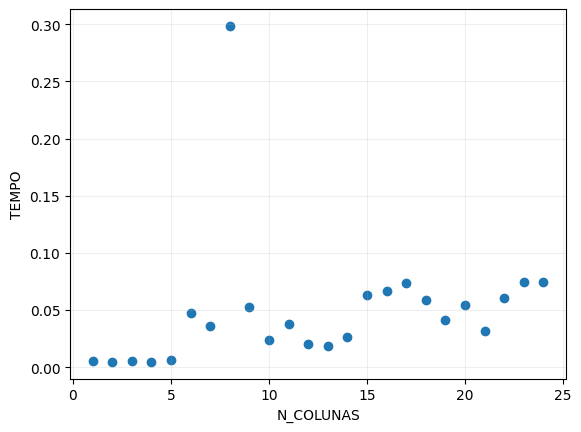

In [41]:
plt.xlabel('N_COLUNAS')
plt.ylabel('TEMPO')
plt.grid(alpha=0.2)
plt.scatter(ncols,tt)

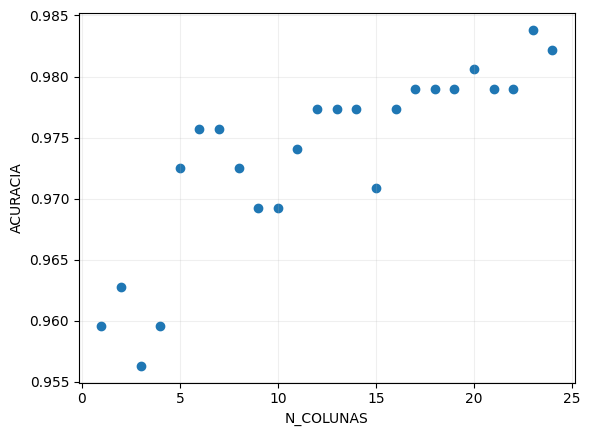

In [42]:
plt.xlabel('N_COLUNAS')
plt.ylabel('ACURACIA')
plt.grid(alpha=0.2)
plt.scatter(ncols,acu)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [44]:
# featuresorted=pd.DataFrame(data=scaler.fit_transform(df[features]),columns=features).var().sort_values(ascending=False).index

In [45]:
featuresorted=pd.DataFrame(data=df[features],columns=features).var().sort_values(ascending=False).index
featuresorted

Index(['D16', 'D42', 'D52', 'D40', 'D57', 'D78', 'D67', 'D65', 'D28', 'D19',
       'D54', 'D55', 'D53', 'D64', 'D58', 'D50', 'D72', 'D24', 'D71', 'D76',
       'D51', 'D49', 'D56', 'D20'],
      dtype='object')

In [46]:
ncols_s=[]
acu_s=[]
f1_s=[]
tt_s=[]

for i in range(1,len(featuresorted)+1):

    start=time.time()
    X=df[featuresorted[0:i]]
    y=df['Indicação do Padrão de Desempenho']
    X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=42)

    clf=LogisticRegression(random_state=42,max_iter=10000)
    clf.fit(X_train,y_train)
    ypred=clf.predict(X_test)

    end=time.time()

    tt_s.append(end-start)
    acu_s.append(accuracy_score(ypred,y_test))
    f1_s.append(f1_score(ypred,y_test))
    ncols_s.append(i)

    #print(end-start,accuracy_score(ypred,y_test),f1_score(ypred,y_test))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


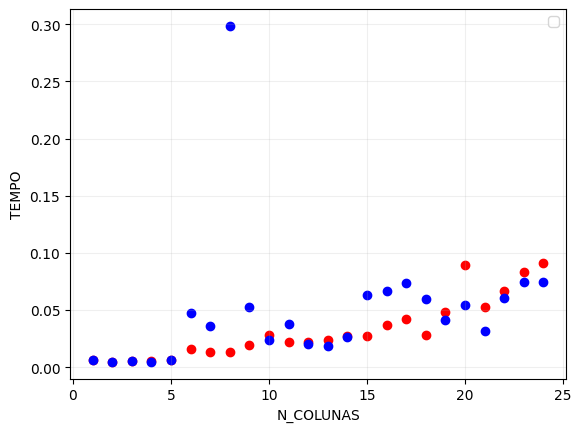

In [47]:
plt.xlabel('N_COLUNAS')
plt.ylabel('TEMPO')
plt.grid(alpha=0.2)
plt.scatter(ncols_s,tt_s, color='red')
plt.scatter(ncols,tt, color='blue')
plt.legend()

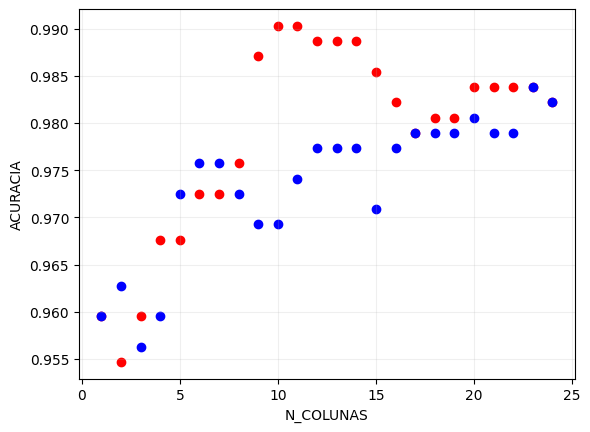

In [48]:
plt.xlabel('N_COLUNAS')
plt.ylabel('ACURACIA')
plt.grid(alpha=0.2)
plt.scatter(ncols_s,acu_s, color='red')
plt.scatter(ncols,acu, color='blue')

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
ncols_a=[]
acu_a=[]
f1_a=[]
tt_a=[]

for i in range(1,len(featuresorted)+1):
  start=time.time()
  X=df[featuresorted[0:i]]
  y=df['Indicação do Padrão de Desempenho']
  X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=42)

  clf=RandomForestClassifier(random_state=42)
  clf.fit(X_train,y_train)
  ypred=clf.predict(X_test)

  end=time.time()

  tt_a.append(end-start)
  acu_a.append(accuracy_score(ypred,y_test))
  f1_a.append(f1_score(ypred,y_test))
  ncols_a.append(i)

# print(end-start,accuracy_score(ypred,y_test),f1_score(ypred,y_test))



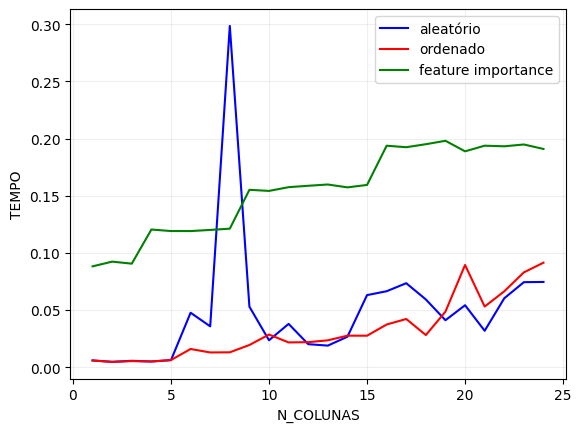

In [51]:
plt.xlabel('N_COLUNAS')
plt.ylabel('TEMPO')
plt.grid(alpha=0.2)
plt.plot(ncols,tt, color='blue', label="aleatório")
plt.plot(ncols_s,tt_s, color='red', label="ordenado")
plt.plot(ncols_a,tt_a, color='green', label="feature importance")
plt.legend()

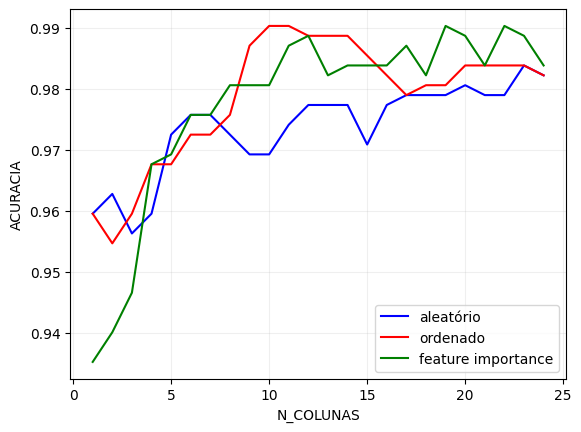

In [52]:
plt.xlabel('N_COLUNAS')
plt.ylabel('ACURACIA')
plt.grid(alpha=0.2)
plt.plot(ncols,acu, color='blue' , label="aleatório")
plt.plot(ncols_s,acu_s, color='red', label="ordenado")
plt.plot(ncols_a,acu_a, color='green', label="feature importance")
plt.legend();